In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')
#display full contents of dataframe cols without truncation
pd.options.display.max_rows 
pd.set_option('display.max_colwidth', -1)

In [6]:
d= pd.read_csv(r"D:\Jigsaw\UC python\ass2\boston.csv")

In [7]:
d.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


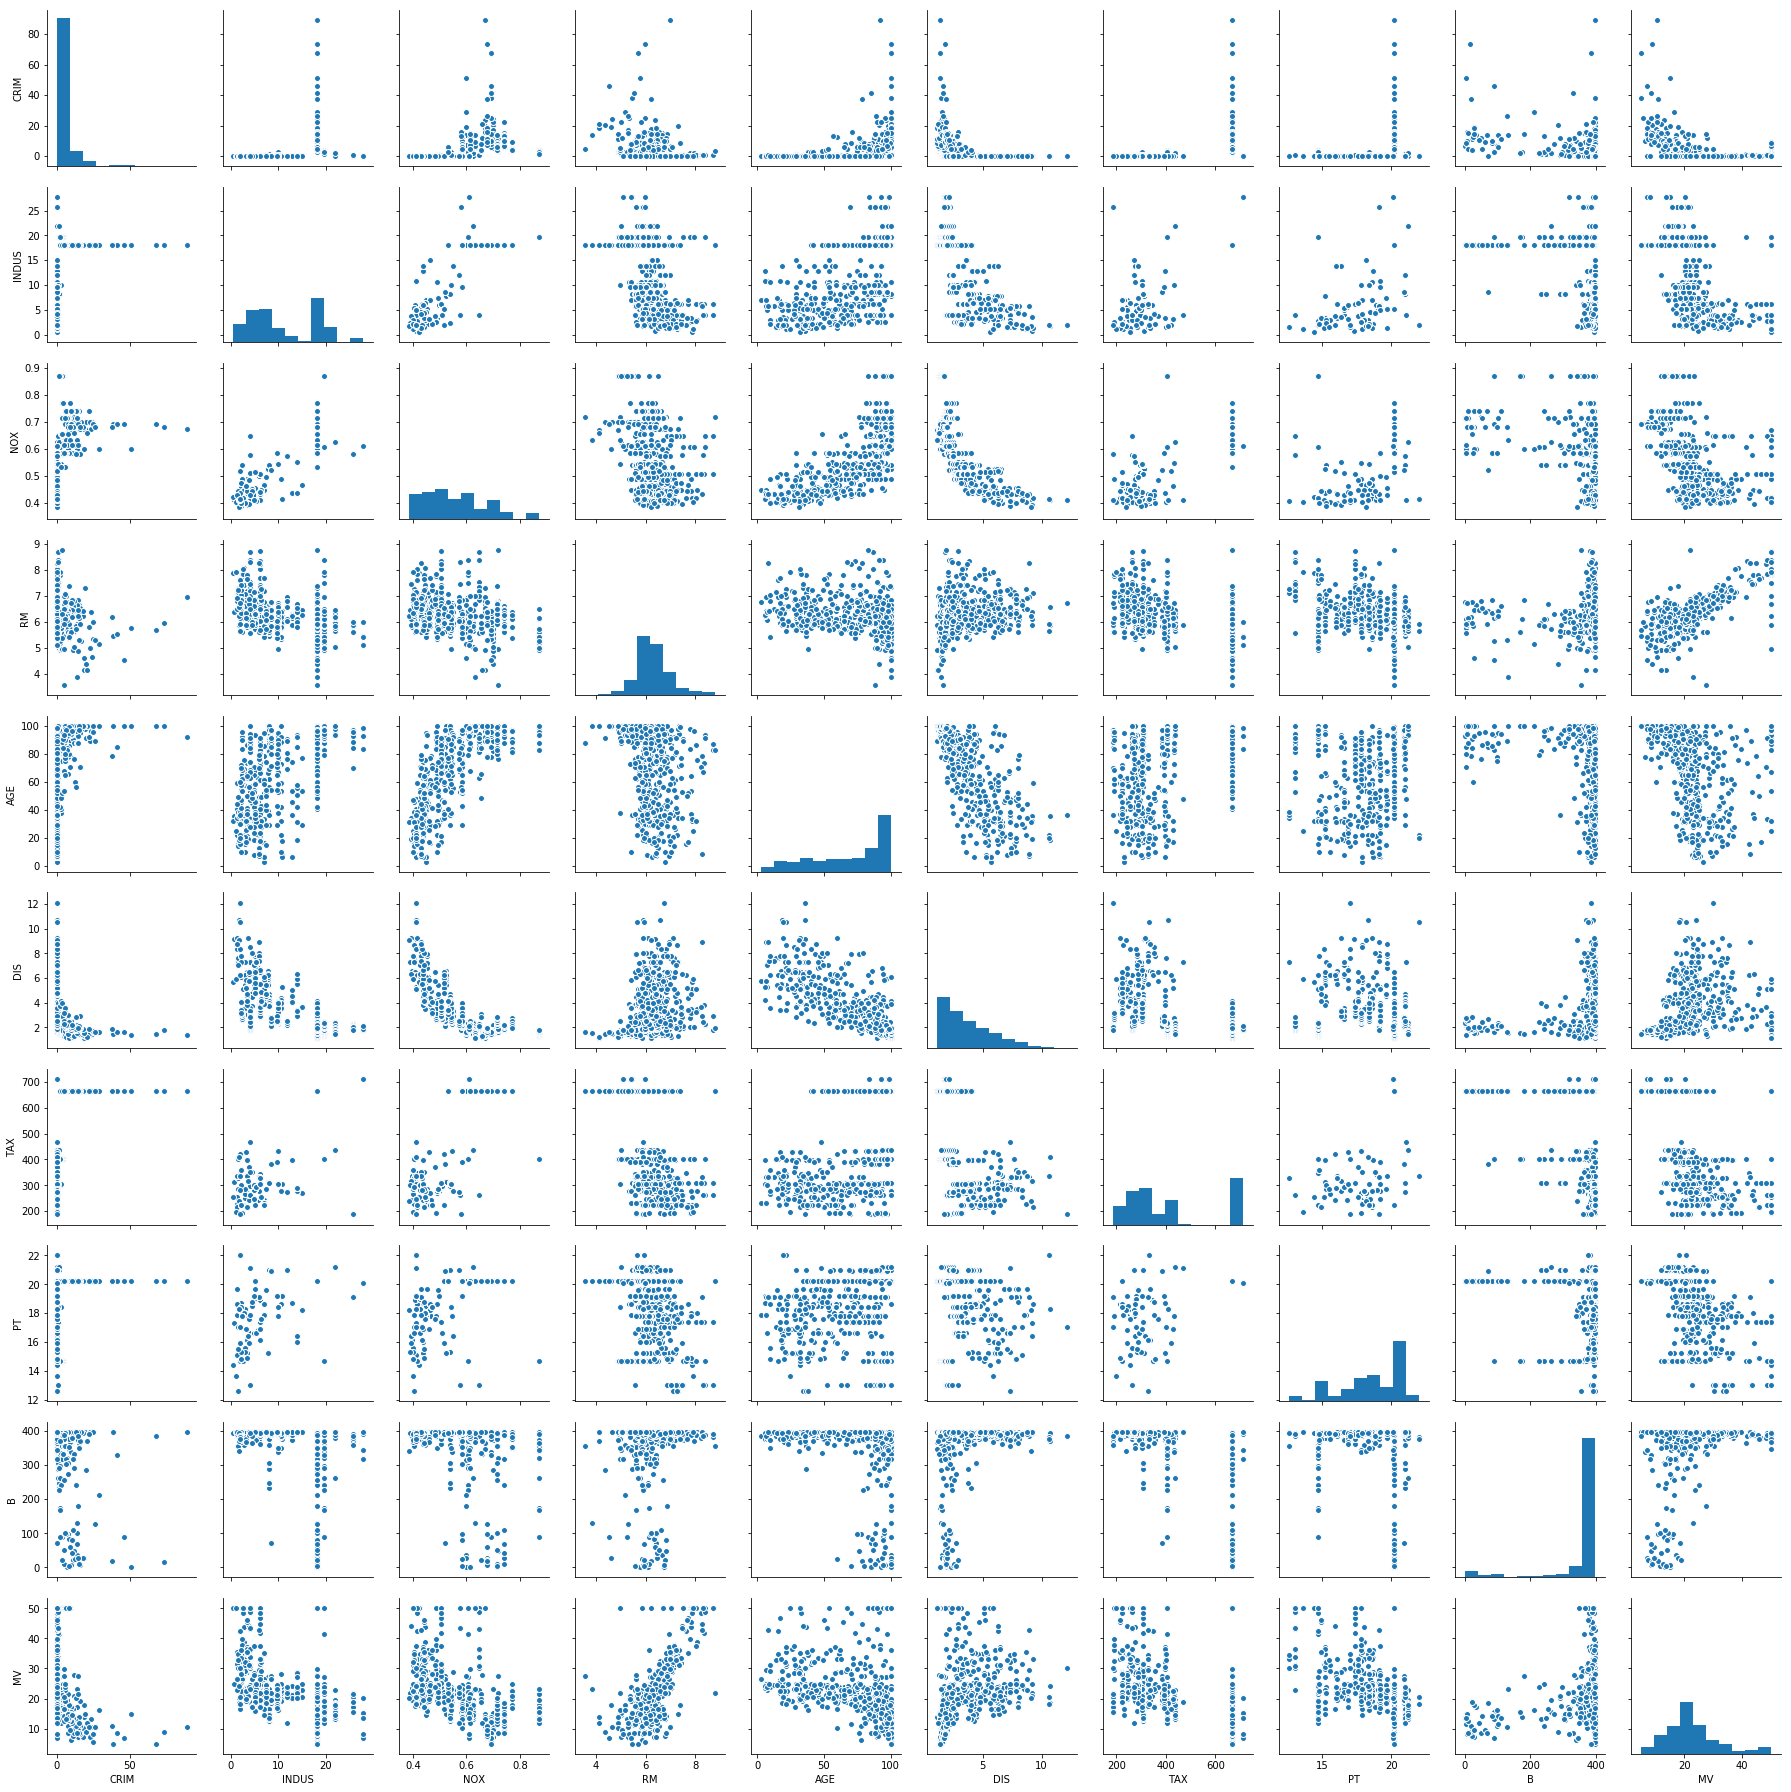

In [8]:
sns.pairplot(d) #nite: sns.pairplot(np.log(d)) looks more like normal distribution !

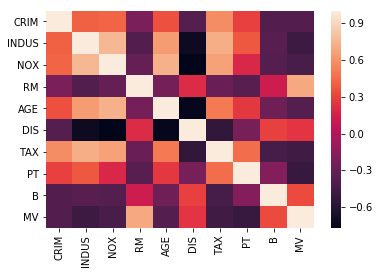

In [9]:
# correlation
pd.set_option('precision', 2)
c=d.corr(method='pearson')
sns.heatmap(c)

We see that MV is highly -vely correlated (decreases when these increase) to Predictors: CRIM, INDUS, NOX, AGE, TAX, PT, as expected and +vely to RM as expected. 
There is also correlation or multicollinearity between the predictors: CRIM/DIS, INDUS/DIS, CRIM/RM, INDUS/RM, NOX/DIS, NOX/RM, RM/PT, etc.

    Dictionary:
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler() #scaling the data since all units are different
df = pd.DataFrame(sc.fit_transform(d.drop('MV', axis=1)))
df.columns=d.columns.drop("MV")
df['MV']=d['MV']
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,-0.42,-1.29,-0.14,0.41,-0.12,0.14,-0.67,-1.46,0.44,24.0
1,-0.42,-0.59,-0.74,0.19,0.37,0.56,-0.99,-0.30,0.44,21.6
2,-0.42,-0.59,-0.74,1.28,-0.27,0.56,-0.99,-0.30,0.40,34.7
3,-0.42,-1.31,-0.84,1.02,-0.81,1.08,-1.11,0.11,0.42,33.4
4,-0.41,-1.31,-0.84,1.23,-0.51,1.08,-1.11,0.11,0.44,36.2


In [12]:
d.head() #original data before scaling

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,6.32e-03,2.31,0.54,6.57,65.2,4.09,296,15.3,396.90,24.0
1,2.73e-02,7.07,0.47,6.42,78.9,4.97,242,17.8,396.90,21.6
2,2.73e-02,7.07,0.47,7.18,61.1,4.97,242,17.8,392.83,34.7
3,3.24e-02,2.18,0.46,7.00,45.8,6.06,222,18.7,394.63,33.4
4,6.90e-02,2.18,0.46,7.15,54.2,6.06,222,18.7,396.90,36.2


In [13]:
df.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B', 'MV'], dtype='object')

In [14]:
# For each X, calculate Variance Inflation Factor and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop(['MV'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
#NOX and INDUS showing high  inflation of variance and hence multicollinearity

,VIF Factor,features
0,1.6,CRIM
1,3.6,INDUS
2,4.3,NOX
3,1.3,RM
4,2.7,AGE
5,3.3,DIS
6,3.2,TAX
7,1.5,PT
8,1.3,B


In [15]:
#drop NOX and INDUS
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop([ 'NOX', 'INDUS','MV'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,1.6,CRIM
1,1.2,RM
2,2.4,AGE
3,2.5,DIS
4,2.3,TAX
5,1.4,PT
6,1.3,B


In [16]:
# drop DIS
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop([ 'NOX', 'INDUS','DIS','MV'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
#better now

,VIF Factor,features
0,1.6,CRIM
1,1.2,RM
2,1.4,AGE
3,2.2,TAX
4,1.4,PT
5,1.3,B


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
import sklearn.metrics as metrics

In [20]:
import statsmodels.api as sm

In [21]:
df.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B', 'MV'], dtype='object')

# trail 1 - Keep all columns

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PT', 'B']], df['MV'], test_size = 0.2,random_state=112)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)
predictions = my_model.predict(X_test)
#pd.DataFrame({'actual value': Y_test, 'predictions':predictions}).sample(5)
my_model.score(X_test, Y_test) #R^2

0.7256164320858526

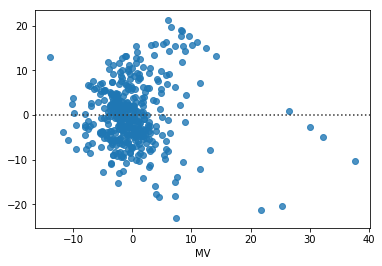

In [23]:
fitted = my_model.predict(X_train)
metrics.mean_squared_error(Y_train,fitted)
resi = Y_train - fitted
sns.residplot(resi,fitted) #residuals seems centered around mean...

In [24]:
preds = my_model.predict(X_test)
metrics.mean_squared_error(Y_test,preds)

25.05716146961331

In [25]:
preds = my_model.predict(X_train)
metrics.mean_squared_error(Y_train,preds)

29.614519380079642

#doing with stats

In [26]:
X_trains = sm.add_constant(X_train)
my_model = sm.OLS(Y_train, X_trains)
result = my_model.fit()
print(result.summary()) #some variables are insignificant likeTAX with p-value>0.05 & the confidence interval for its coefficient includes zero 

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     78.34
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.48e-82
Time:                        23:13:32   Log-Likelihood:                -1257.7
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     394   BIC:                             2575.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6033      0.275     82.253      0.0

Some variables are insignificant like TAX with p-value>0.05 & the confidence interval for its coefficient includes zero 

# trial 2 - Remove TAX

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PT', 'B']], df['MV'], test_size = 0.2,random_state=112)
my_model2 = LinearRegression()
my_model2.fit(X_train, Y_train)
my_model2.score(X_test, Y_test) # score has increased a little

0.7259104836332606

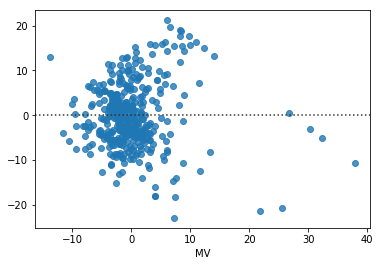

In [28]:
fitted = my_model2.predict(X_train)
metrics.mean_squared_error(Y_train,fitted)
resi = Y_train - fitted
sns.residplot(resi,fitted)

In [29]:
preds = my_model2.predict(X_test)
metrics.mean_squared_error(Y_test,preds)

25.0303081957099

In [30]:
X_trains = sm.add_constant(X_train)
my_model2o = sm.OLS(Y_train, X_trains)
result = my_model2o.fit()
print(result.summary()) 
#some variables are insignificant like INDUS with p-value>0.05 & the confidence interval for its coefficient includes zero 

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     88.23
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.28e-83
Time:                        23:13:33   Log-Likelihood:                -1257.9
No. Observations:                 404   AIC:                             2534.
Df Residuals:                     395   BIC:                             2570.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6018      0.275     82.318      0.0

# trial 3 - Remove INDUS

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PT', 'B']], df['MV'], test_size = 0.2,random_state=112)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)
my_model.score(X_test, Y_test) #R-squared has increased, but let us check adjusted R-squared as well

0.7341993321923453

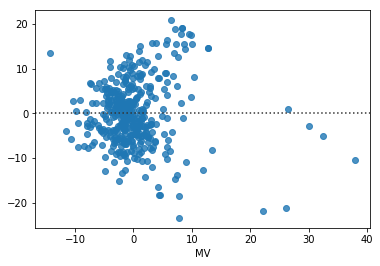

In [32]:
fitted = my_model.predict(X_train)
metrics.mean_squared_error(Y_train,fitted)
resi = Y_train - fitted
sns.residplot(resi,fitted)

In [33]:
preds = my_model.predict(X_test)
metrics.mean_squared_error(Y_test,preds)

24.273356828975203

In [34]:
X_trains = sm.add_constant(X_train)
my_model = sm.OLS(Y_train, X_trains)
result = my_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     99.77
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.16e-83
Time:                        23:13:33   Log-Likelihood:                -1259.6
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     396   BIC:                             2567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6139      0.275     82.142      0.0

Both R-squared and Adjusted R-squared has reduced ! But RMSE has reduced too. We will finalise this model.

# Thank you !